<a href="https://colab.research.google.com/github/faizanindyo/FaizAnd/blob/main/Tugas%207/Lecture_7_XGB_Muhammad_Faiz_1103213011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Faiz Anindyo Widodo

NIM : 1103213011

Task Lecture 7 XGBoost

Data set : melb_data.csv

Dokumentasi ChatGPT : https://chat.openai.com/share/8019d905-4973-4759-9e69-5b6025f391c9

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns



In [2]:
# Mengakses Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load data dari Google Drive
file_path = '/content/drive/MyDrive/MACHINE LAERNING/melb_data.csv'
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [4]:
# Menghilangkan nilai yang hilang
data_cleaned = data.dropna()

# Cetak informasi tentang DataFrame yang telah dibersihkan
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6196 entries, 1 to 15395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6196 non-null   int64  
 1   Suburb         6196 non-null   object 
 2   Address        6196 non-null   object 
 3   Rooms          6196 non-null   int64  
 4   Type           6196 non-null   object 
 5   Price          6196 non-null   float64
 6   Method         6196 non-null   object 
 7   SellerG        6196 non-null   object 
 8   Date           6196 non-null   object 
 9   Distance       6196 non-null   float64
 10  Postcode       6196 non-null   float64
 11  Bedroom2       6196 non-null   float64
 12  Bathroom       6196 non-null   float64
 13  Car            6196 non-null   float64
 14  Landsize       6196 non-null   float64
 15  BuildingArea   6196 non-null   float64
 16  YearBuilt      6196 non-null   float64
 17  CouncilArea    6196 non-null   object 
 18  Lattitude   

In [6]:
# Membuat pairplot
sns.pairplot(data_numeric)
plt.show()

NameError: name 'data_numeric' is not defined

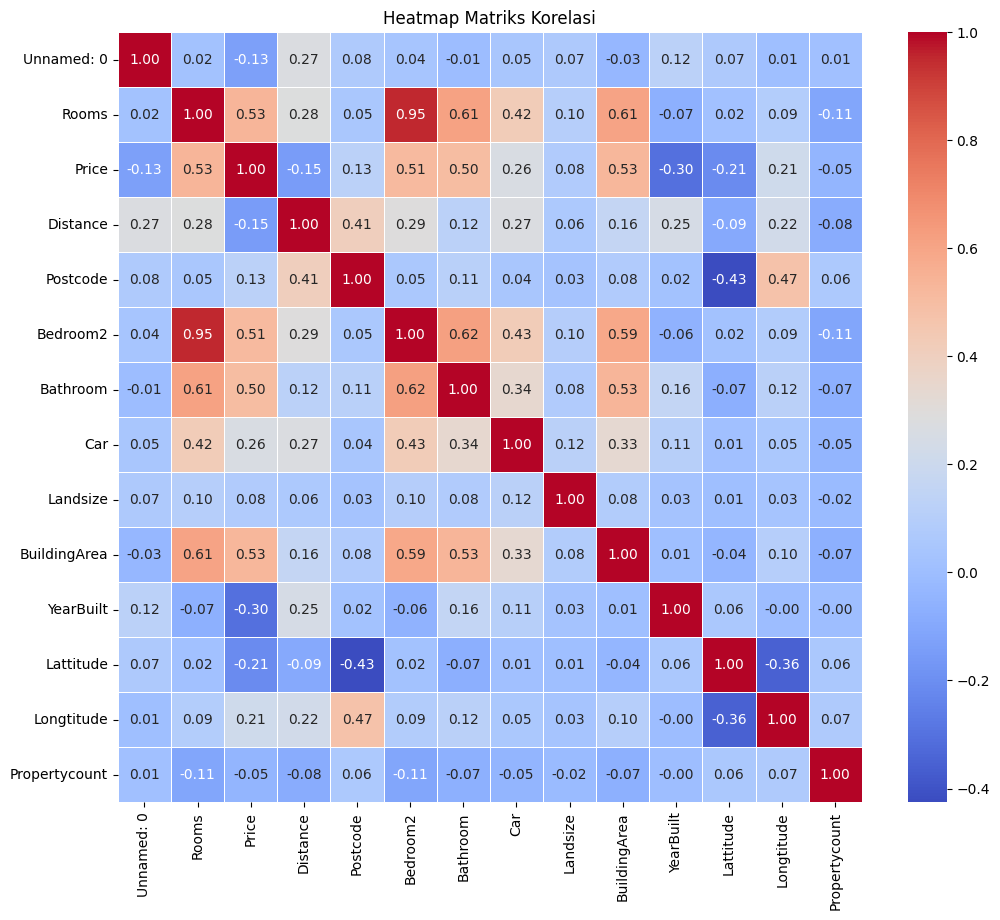

In [7]:
# Menghapus kolom non-numerik
data_numeric = data_cleaned.select_dtypes(include=[np.number])

# Menghitung matriks korelasi
correlation_matrix = data_numeric.corr()

# Membuat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Matriks Korelasi')
plt.show()

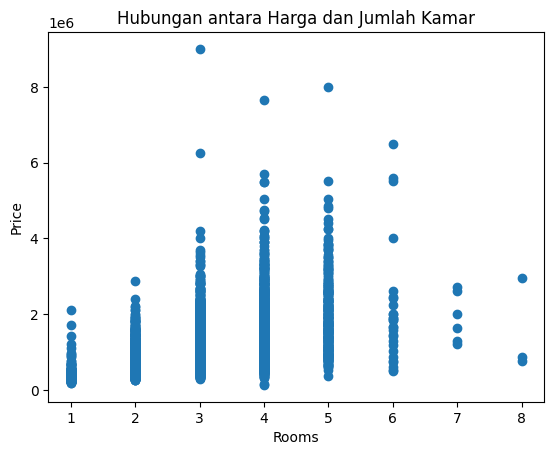

MAE XGBoost: 160100.03033384884
MAE Random Forest: 162703.60207638514
MAE Decision Tree: 224353.27810650886


In [9]:
# Rekayasa fitur
# Misalnya, kita akan menghapus kolom yang memiliki nilai NaN
data = data.dropna(axis=0)

# One-hot encoding untuk fitur non-numerik
data_encoded = pd.get_dummies(data)

# Memvisualisasikan data
# Misalnya, kita akan memvisualisasikan hubungan antara harga dan jumlah kamar tidur
plt.scatter(data['Rooms'], data['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Hubungan antara Harga dan Jumlah Kamar')
plt.show()

# Membagi data menjadi data pelatihan dan data pengujian (70% pelatihan, 30% pengujian)
X = data_encoded.drop('Price', axis=1)
y = data_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Latih model menggunakan XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Latih model menggunakan Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Latih model menggunakan Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Evaluasi menggunakan Mean Absolute Error (MAE)
xgb_pred = xgb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)

print("MAE XGBoost:", xgb_mae)
print("MAE Random Forest:", rf_mae)
print("MAE Decision Tree:", dt_mae)
